In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.special 
import powerlaw
import scipy
import seaborn as sn
from random import sample
import networkx as nx
import random


from scipy.stats import bernoulli

In [150]:
distr = powerlaw.Power_Law(discrete = True, xmin = 2, parameters = [2.7])
data = distr.generate_random(n = 600000)

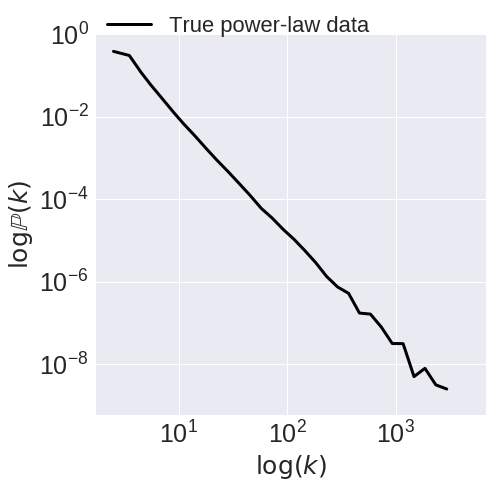

In [168]:
from matplotlib import rcParams

#rcParams.update({'font.size':14})
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(7,7))
powerlaw.plot_pdf(data, color = 'black', lw = 3, label = 'True power-law data')
plt.legend(fontsize = 22, bbox_to_anchor=(0.75, 1.1))
plt.xlabel('$\log(k)$', fontsize = 25)
plt.ylabel('$\log\mathbb{P}(k)$', fontsize = 25)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(25)           
plt.savefig('empirical_density.pdf', dpi=200, bbox_inches='tight')

In [152]:
fit_AD = powerlaw.Fit(data, discrete = True, xmin_distance='Asquare')

Calculating best minimal value for power law fit
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [153]:
fit_AD.power_law.alpha, fit_AD.power_law.xmin, fit_AD.power_law.Asquare

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.7133808772086203, 18.0, 0.016599040874411292)

# Test

In [27]:
AD_distances_rw_noisy = []
n_synth_samples = 200
observed_AD = fit_AD.power_law.Asquare
data = np.array(data)

In [28]:
data_noisy = np.hstack((np.array(data),data[data>700]))

In [29]:
fit_AD_noisy = powerlaw.Fit(data_noisy, discrete = True, xmin_distance='Asquare')

Calculating best minimal value for power law fit
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [30]:
fit_AD_noisy.power_law.alpha, fit_AD_noisy.power_law.xmin, fit_AD_noisy.power_law.Asquare

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.76533516767428, 7.0, 0.02272339447780007)

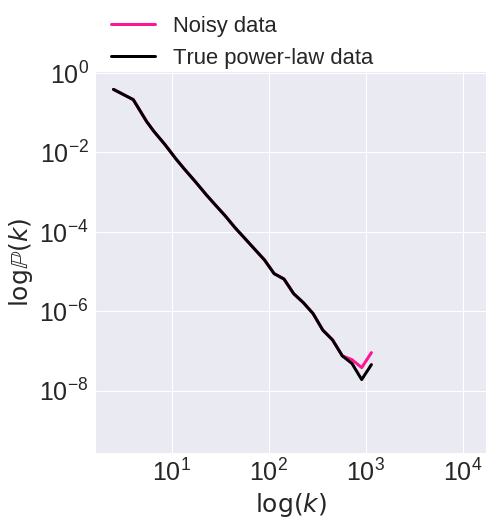

In [51]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(7,7))
powerlaw.plot_pdf(data_noisy, color = 'deeppink', lw = 3, label = 'Noisy data')
powerlaw.plot_pdf(data, color = 'black', lw = 3, label = 'True power-law data')
plt.legend(fontsize = 22, bbox_to_anchor=(0.76, 1.2))
plt.xlabel('$\log(k)$', fontsize = 25)
plt.ylabel('$\log\mathbb{P}(k)$', fontsize = 25)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(25)           
plt.savefig('empirical_density_plus_noisy.pdf', dpi=200, bbox_inches='tight')

In [37]:
n = float(len(data_noisy))
n_tail_AD_sample = float(len(data_noisy[data_noisy>=fit_AD_noisy.power_law.xmin]))
non_pl_AD_sample = data_noisy[data_noisy<fit_AD_noisy.power_law.xmin]
B_AD = bernoulli(n_tail_AD_sample/n)

m = 0

while m<n_synth_samples:
    bern_AD = B_AD.rvs(size = len(data_noisy))
    AD_distances_rw_noisy.append(powerlaw.Fit(np.hstack((fit_AD_noisy.power_law.generate_random(n = len(bern_AD[bern_AD==1]),
                                                                                         estimate_discrete = True),
                                                        np.random.choice(non_pl_AD_sample,
                                                                         len(bern_AD[bern_AD==0]),
                                                                         replace=True))),
                                             discrete = True,xmin_distance = 'Asquare').power_law.Asquare)

    m = m+1

Calculating best minimal value for power law fit
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calcul

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [38]:
AD_distances_rw_noisy = np.array(AD_distances_rw_noisy)
observed_AD_noisy = fit_AD_noisy.power_law.Asquare

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


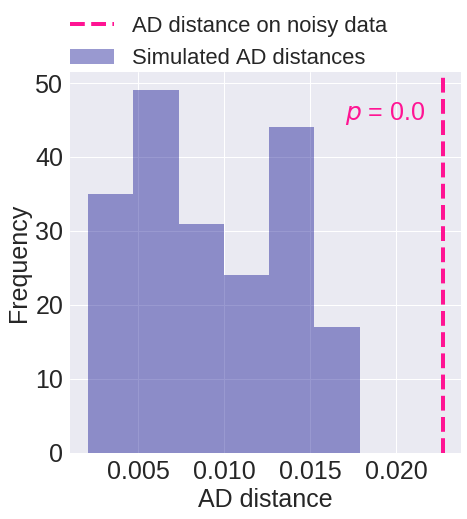

In [98]:
fig, ax = plt.subplots(figsize=(7,7))
sn.distplot(AD_distances_rw_noisy,color = 'darkblue', kde = False,label = 'Simulated AD distances')
plt.axvline(observed_AD_noisy,0,50, ls = '--',lw = 4, color = 'deeppink',label = 'AD distance on noisy data')
# plt.title('p-value = {}'.format(float(len(AD_distances_rw_noisy[AD_distances_rw_noisy>observed_AD_noisy]))/float(len(AD_distances_rw_noisy))),
#          fontsize = 16)
plt.legend(fontsize = 22, bbox_to_anchor=(-0.05, 1.2), loc='upper left')
plt.xlabel("AD distance", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(25)     
plt.text(0.017, 45, r'$p$ = {}'.format(float(len(AD_distances_rw_noisy[AD_distances_rw_noisy>observed_AD_noisy]))/float(len(AD_distances_rw_noisy))),
          fontsize = 25, color='deeppink')
plt.savefig('AD_noisy.pdf', dpi=200, bbox_inches='tight')

In [116]:
fit_AD = powerlaw.Fit(data, discrete = True, xmin_distance='Asquare')

Calculating best minimal value for power law fit
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [117]:
fit_AD.power_law.alpha, fit_AD.power_law.xmin, fit_AD.power_law.Asquare

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.7329794254361826, 14.0, 0.00962717801573888)

In [158]:
AD_distances_rw = []
n_synth_samples = 200
observed_AD = fit_AD.power_law.Asquare
data = np.array(data)

In [159]:
n = float(len(data))
n_tail_AD_sample = float(len(data[data>=fit_AD.power_law.xmin]))
non_pl_AD_sample = data[data<fit_AD.power_law.xmin]
B_AD = bernoulli(n_tail_AD_sample/n)

m = 0

while m<n_synth_samples:
    bern_AD = B_AD.rvs(size = len(data))
    AD_distances_rw.append(powerlaw.Fit(np.hstack((fit_AD.power_law.generate_random(n = len(bern_AD[bern_AD==1]),
                                                                                         estimate_discrete = True),
                                                        np.random.choice(non_pl_AD_sample,
                                                                         len(bern_AD[bern_AD==0]),
                                                                         replace=True))),
                                             discrete = True,xmin_distance = 'Asquare').power_law.Asquare)

    m = m+1

Calculating best minimal value for power law fit
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calcul

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [160]:
AD_distances_rw = np.array(AD_distances_rw)

/home/vero/miniconda2/envs/py36/lib/python3.6/site-packages/scipy-1.1.0-py3.6-linux-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


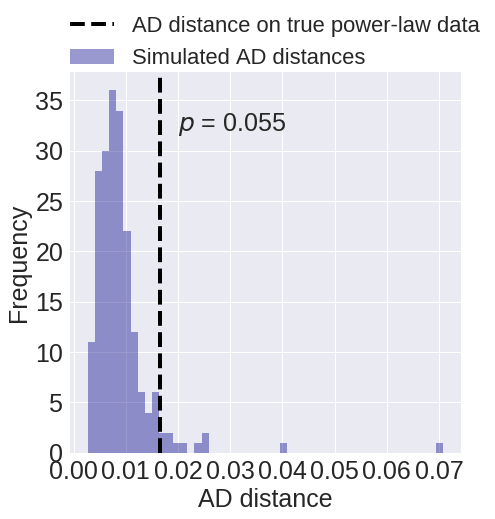

In [164]:
fig, ax = plt.subplots(figsize=(7,7))
sn.distplot(AD_distances_rw,color = 'darkblue', kde = False,label = 'Simulated AD distances')
plt.axvline(observed_AD,0,50, ls = '--', lw = 4,color = 'black',label = 'AD distance on true power-law data')
# plt.title('p-value = {}'.format(float(len(AD_distances_rw[AD_distances_rw>observed_AD]))/float(len(AD_distances_rw))),
#          fontsize = 16)
plt.legend(fontsize = 22, bbox_to_anchor=(-0.05, 1.2), loc='upper left')
plt.xlabel("AD distance", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)
#plt.xticks([0.004, 0.008, 0.012, 0.016])
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(25) 
plt.text(0.02, 32, r'$p$ = {}'.format(float(len(AD_distances_rw[AD_distances_rw>observed_AD]))/float(len(AD_distances_rw))),
          fontsize = 25)
plt.savefig('AD_true2.pdf', dpi=200, bbox_inches='tight')